# **COVID-19 Case Distribution and Determinants in Indonesia**

## Background

We are data analysts of a health organization tasked with analyzing covid data in Indonesia. This data will be used as a reference when a new outbreak such as covid occurs.

## Objective

Analyzing the trend of Covid spread in Indonesia and the influence of population density on the total number of new cases in the regions

In [56]:
# Data manipulation
import pandas as pd

# Data viz
import matplotlib.pyplot as plt
import plotly.express as px

# SQL command
import duckdb as db

# Map
import folium

In [19]:
# choose chart style
import matplotlib as mpl
mpl.style.use('ggplot')

In [2]:
# define function to run SQL queries
def sql(sql_query: str) -> pd.DataFrame:
    return db.sql(sql_query).to_df()

In [73]:
# Set display maximum columns
pd.set_option('display.max_columns', None)

## Load and explore data

In [4]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv', parse_dates=['Date'])
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

## Data Preprocessing

In [6]:
# Change the string format of column names to make queries easier
df.columns = (
    df.columns.str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)

In [7]:
df.tail()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,city_or_regency,province,country,continent,island,time_zone,special_status,total_regencies,total_cities,total_districts,total_urban_villages,total_rural_villages,area_km2,population,population_density,longitude,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,2022-09-16,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,28460,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [8]:
# drop unused columns
df = (
    df.drop([
        'province',
        'country',
        'continent',
    ], axis= 1)
)

In [9]:
df['location_level'].unique()

array(['Province', 'Country'], dtype=object)

The dataset includes two distinct levels of location data: **province** and **country**. To ensure clarity and focus in our analysis, we will exclusively utilize the data at the province level. This approach will prevent potential confusion and enhance the precision of our findings.

In [10]:
df = df[df['location_level']=='Province']
df['location_level'].unique()

array(['Province'], dtype=object)

After that we delete the **location_level** column because it is no longer needed.

In [11]:
df = df.drop('location_level', axis=1)

In [12]:
df.isna().sum()

date                               0
location_iso_code                  0
location                           0
new_cases                          0
new_deaths                         0
new_recovered                      0
new_active_cases                   0
total_cases                        0
total_deaths                       0
total_recovered                    0
total_active_cases                 0
city_or_regency                30893
island                             0
time_zone                          0
special_status                 26335
total_regencies                    0
total_cities                     901
total_districts                    0
total_urban_villages             904
total_rural_villages             929
area_km2                           0
population                         0
population_density                 0
longitude                          0
latitude                           0
new_cases_per_million              0
total_cases_per_million            0
n

After seeing this information, the columns that have NaN values ​​will not be used for later analysis, so we will drop the columns that have NaN values.

In [13]:
df = df.dropna(axis=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30893 entries, 0 to 30892
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      30893 non-null  datetime64[ns]
 1   location_iso_code         30893 non-null  object        
 2   location                  30893 non-null  object        
 3   new_cases                 30893 non-null  int64         
 4   new_deaths                30893 non-null  int64         
 5   new_recovered             30893 non-null  int64         
 6   new_active_cases          30893 non-null  int64         
 7   total_cases               30893 non-null  int64         
 8   total_deaths              30893 non-null  int64         
 9   total_recovered           30893 non-null  int64         
 10  total_active_cases        30893 non-null  int64         
 11  island                    30893 non-null  object        
 12  time_zone         

Check duplicate data

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,island,time_zone,total_regencies,total_districts,area_km2,population,population_density,longitude,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Jawa,UTC+07:00,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Jawa,UTC+07:00,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%
2,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Sumatera,UTC+07:00,10,169,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%
3,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Jawa,UTC+07:00,1,44,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%
4,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,60,-60,Jawa,UTC+07:00,18,627,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%


### Data Time Range

In [17]:
sql(
    """
    SELECT 
        MIN(date) AS earliest_data,
        MAX(date) AS latest_data
    FROM df
    """
)

,earliest_data,latest_data
0,2020-03-01,2022-09-15


The dataset contains COVID-19 data spanning from March 2020 to September 2022.

## Trend of New Cases per Month

In [28]:
# create data frame of new cases per month
new_cases_per_month_num = sql(
    """
    WITH monthly_cases AS (
        SELECT 
            DATE_TRUNC('month', date) AS month,
            SUM(new_cases) AS total_new_cases
        FROM df
        GROUP BY month
        ORDER BY month
    )
    SELECT 
        month,
        total_new_cases
    FROM monthly_cases
    ORDER BY month
    """
)

new_cases_per_month_name = sql(
    """
    SELECT 
        STRFTIME(month, '%b %Y') AS month_year,
        total_new_cases,
    FROM new_cases_per_month_num
    """
)

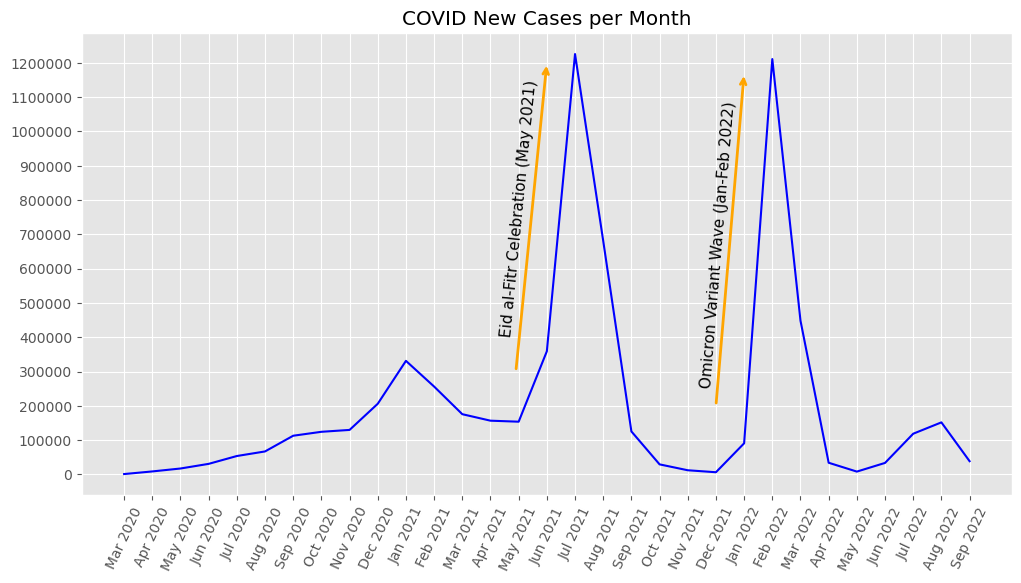

In [29]:
# chart of new cases per month
fig, ax = plt.subplots(figsize= (12, 6))

ax.plot(new_cases_per_month_name['month_year'], new_cases_per_month_name['total_new_cases'], 
        label= 'Total New Cases',
        color= 'blue')

plt.title('COVID New Cases per Month')
plt.xticks(rotation= 65)
ax.ticklabel_format(axis= 'y', style= 'plain', useOffset= False)
ax.yaxis.set_major_locator(plt.MultipleLocator(100000))

plt.annotate('',  
             xy= (15, 1200000), 
             xytext= (13.9, 300000),  
             xycoords= 'data',  
             arrowprops= dict(arrowstyle= '->', connectionstyle= 'arc3', color= 'orange', lw= 2))

plt.annotate('Eid al-Fitr Celebration (May 2021)',
             xy= (13.3, 400000),  
             rotation= 84.4,  
             va= 'bottom', 
             ha= 'left',
             fontsize= 11)

plt.annotate('',  
             xy= (22, 1170000), 
             xytext= (21, 200000),  
             xycoords= 'data',  
             arrowprops= dict(arrowstyle= '->', connectionstyle= 'arc3', color= 'orange', lw= 2))

plt.annotate('Omicron Variant Wave (Jan-Feb 2022)',
             xy= (20.4, 250000),  
             rotation= 85.3,  
             va= 'bottom', 
             ha= 'left',
             fontsize= 11)

plt.show()

The chart presents the trend of COVID-19 cases in Indonesia from May 2020 through September 2022. We observe two prominent spikes in cases, occurring in May-July 2021 and January-February 2022, which we will explore further.

**First Spike: May-July 2021**

In mid 2021, there was a significant increase in new cases. Although direct supporting data for this analysis is lacking, this spike coincides with the period following the Eid al-Fitr celebration, one of the largest holidays in Indonesia. Traditionally, this celebration is accompanied by mass travel, known as 'mudik', potentially leading to increased social interactions and mobility.

Without definitive data to link the spike solely to the Eid celebration—such as mobility reports or social interaction levels—it's reasonable to hypothesize that major events like Eid al-Fitr could potentially influence the spread of the virus, based on general understandings of infectious disease transmission.

**Second Spike: January-February 2022**

A significant increase occurred in early 2022, coinciding with the emergence of the highly transmissible Omicron variant globally. Again, while specific data to prove direct causality in Indonesia is absent, global patterns suggest that the spread of the Omicron variant contributed to increased cases in many countries, likely including Indonesia

**Discussion**

When analyzing this data, it's important to remember that seeing a trend doesn't necessarily mean one event causes another. Without more data, we should avoid making firm conclusions. Nonetheless, these observations point out the need for more detailed analysis to better understand the factors affecting COVID-19 case trends.

**Conclusion**

This chart provides valuable insights into the dynamics of COVID-19 spread in Indonesia, illustrating the importance of public health policies and effective monitoring. Furthermore, it underscores the necessity for preparedness in facing potential future surges, which could be triggered by large social events or the emergence of new variants.

In [30]:
compare_trend_num = sql(
    """
    SELECT 
        DATE_TRUNC('month', date) AS month,
        SUM(new_cases) AS total_new_cases,
        SUM(new_deaths) AS total_new_deaths,
        SUM(new_recovered) AS total_new_recovered
    FROM df
    GROUP BY month
    ORDER BY month
    """
)

compare_trend_name = sql(
    """
    SELECT 
        STRFTIME(month, '%b %Y') AS month_year,
        total_new_cases,
        total_new_deaths,
        total_new_recovered
    FROM compare_trend_num
    """
)


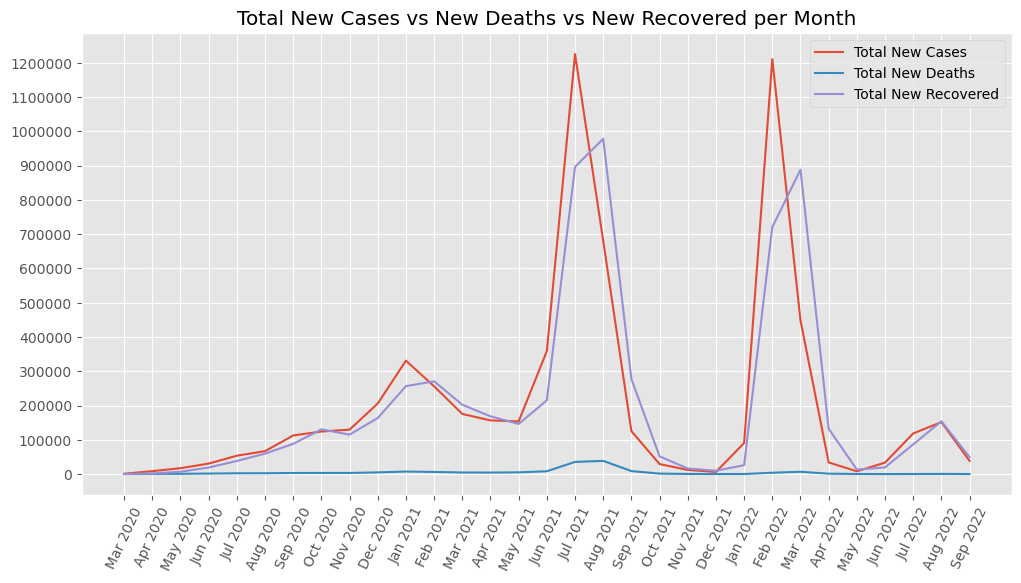

In [34]:
fig, ax = plt.subplots(figsize= (12, 6))

ax.plot(compare_trend_name['month_year'], compare_trend_name['total_new_cases'], label= 'Total New Cases')
ax.plot(compare_trend_name['month_year'], compare_trend_name['total_new_deaths'], label= 'Total New Deaths')
ax.plot(compare_trend_name['month_year'], compare_trend_name['total_new_recovered'], label= 'Total New Recovered')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total New Cases vs New Deaths vs New Recovered per Month')
ax.legend()

plt.xticks(rotation= 65)
ax.ticklabel_format(axis= 'y', style= 'plain', useOffset= False)
ax.yaxis.set_major_locator(plt.MultipleLocator(100000))
plt.show()

**Correlation Between Cases and Recoveries:**

The graph shows a strong correlation between the rise and fall of new cases and new recoveries. This suggests that as more people are diagnosed with COVID-19, more people recover, likely due to the concurrent handling of these cases within the healthcare system.

**Deaths Relative to Cases:**

There is a noticeable increase in deaths that accompanies the rise in new cases during 2021. However, during the surge in 2022, the increase in deaths is less pronounced compared to the increase in cases.
This could potentially be attributed to several factors, such as improved treatments or higher vaccination rates.

## Distribution of COVID-19 Cases in Indonesia by Location

***Note: Due to github's limitations in showing interactive charts, the chart cannot be rendered directly by github. Please see the results in the portfolio.***

In [49]:
new_cases_by_location = sql(
    """
    SELECT 
        island,
        location,
        SUM(new_cases) AS total_new_cases
    FROM df
    GROUP BY island, location
    ORDER BY island, location
    """
)
new_cases_by_location.head()

,island,location,total_new_cases
0,Jawa,Banten,333875.0
1,Jawa,DKI Jakarta,1412474.0
2,Jawa,Daerah Istimewa Yogyakarta,224307.0
3,Jawa,Jawa Barat,1173731.0
4,Jawa,Jawa Tengah,636409.0


In [52]:
fig = px.sunburst(
    new_cases_by_location,
    path=['island', 'location'], 
    values='total_new_cases',
    title='Total Cases Over Time',
    template='plotly',        
    width=1000, 
    height=1000
)

fig.update_traces(textinfo='label+percent parent') 
fig.update_layout(
    title_text='Distribution of COVID-19 Cases in Indonesia by Location', 
    title_x=0.5           
)

fig.show()

The chart reveals that the island of Java, particularly DKI Jakarta, is the most affected by COVID-19 cases in Indonesia. DKI Jakarta alone comprises 32% of the cases, the highest among all regions. Collectively, the provinces on Java—including DKI Jakarta, Jawa Barat, Jawa Tengah, and Jawa Timur—account for 69% of the total cases, indicating a significant concentration of the pandemic within this island.

## Geographic Analysis

To see the distribution of cases in Indonesia, we can make a map by utilizing the folium library.

***Note: Due to github's limitations in showing interactive charts, the chart cannot be rendered directly by github. Please see the results in the portfolio.***

In [54]:
geo_data = sql(
    """
    SELECT
        location,
        MAX(total_cases) AS total_cases,
        AVG(latitude) AS latitude,
        AVG(longitude) AS longitude
    FROM df
    GROUP BY location;
    """
)

In [61]:
# Create a map

m = folium.Map(location=[geo_data['latitude'].mean(), geo_data['longitude'].mean()], zoom_start=5)

# Add markers for each province

for i, row in geo_data.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['total_cases']/5 ,  
        color='crimson',  
        fill=True,
        fill_color='crimson',  
        tooltip=f"{row['location']}: {row['total_cases']} cases",  
    ).add_to(m)

# show map
m

## Total Cases vs Population Density

In [63]:
cases_vs_popdens = sql(
    """
    SELECT 
        location,
        MAX(total_cases) total_cases,
        AVG(population_density) as population_density
    FROM df
    GROUP BY location
    ORDER BY total_cases DESC
    """
)

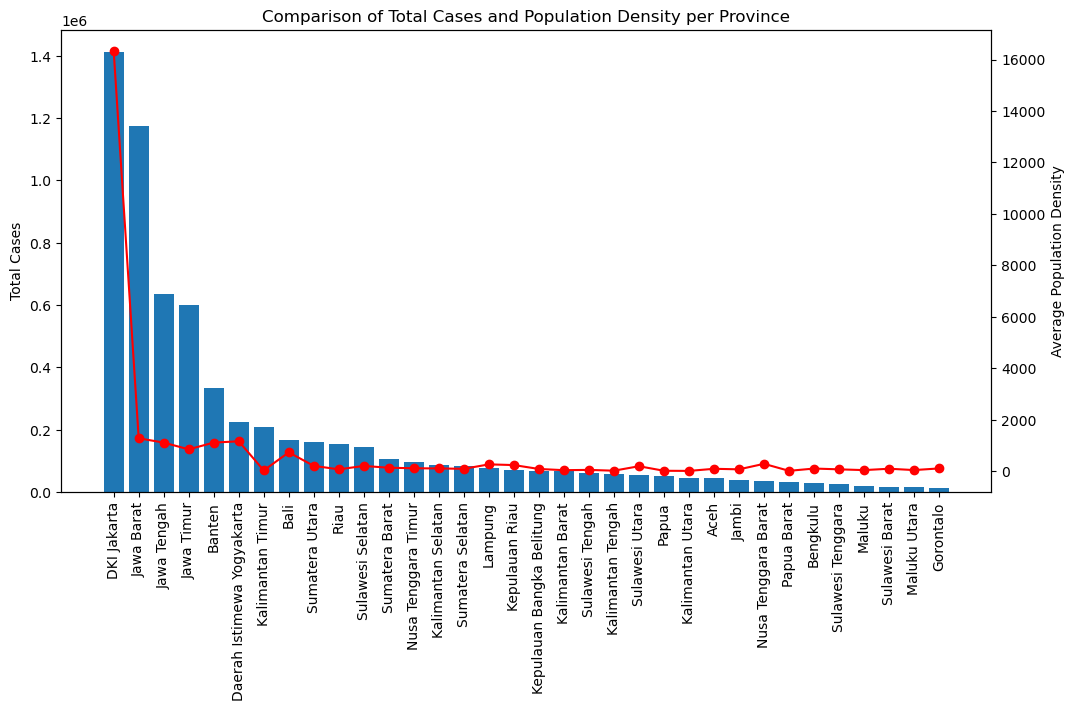

In [71]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(cases_vs_popdens['location'], cases_vs_popdens['total_cases'])
ax1.set_xlabel('')
ax1.set_ylabel('Total Cases')   
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(cases_vs_popdens['location'], cases_vs_popdens['population_density'], color='r', marker='o')
ax2.set_ylabel('Average Population Density')

plt.title('Comparison of Total Cases and Population Density per Province')
plt.show()

Generally, there appears to be a correlation between population density and the number of COVID-19 cases. Provinces with higher population densities tend to have more cases. This pattern suggests that transmission rates could be influenced by the population concentration.

## Conclusion

The analysis of COVID-19 data in Indonesia from March 2020 to September 2022 shows significant fluctuations in case numbers, with prominent spikes in May-July 2021 and January-February 2022. These increases align with major events such as Eid al-Fitr and the global emergence of the Omicron variant. The island of Java, particularly DKI Jakarta, exhibits the highest concentration of cases, significantly impacted by factors like population density, which correlates with the spread of the virus.

## Recommendations

- Implement more stringent monitoring and preventive measures during and after major holidays or events like Eid al-Fitr, when increased travel and social interaction heighten the risk of virus spread.
- Strengthen health infrastructure in areas with high population density, particularly on Java, to manage surges more effectively.
- Maintain and enhance data collection and analysis capabilities to identify emerging trends and respond quickly to potential future surges in cases.